Chapter 23
# 用Pandas + Plotly讲故事
Book_1《编程不难》 | 鸢尾花书：从加减乘除到机器学习  

In [2]:
# 导入包
import seaborn as sns
import pandas as pd
import plotly.express as px

In [3]:
# 使用Seaborn加载鸢尾花数据集
df = sns.load_dataset("iris")

In [4]:
# ! python -m pip install --upgrade plotly

In [5]:
# ! pip install -U kaleido

In [6]:
df_ = df.copy()
df_["species_numerical"] = df_["species"].map({"setosa": 0, "versicolor": 1, "virginica": 2})

In [7]:
# 用plotly绘制散点图，边缘为箱型图，分类为 species
fig = px.scatter(df,
                 x = 'sepal_length', y = 'petal_length',
                 color = 'species',
                 marginal_x = 'box',
                 marginal_y = 'box',
                 template = "plotly_white",
                 width=600, height=500,
                 color_discrete_sequence=px.colors.qualitative.Pastel1,
                 labels={"sepal_length": "Sepal Length (cm)","petal_length": "Petal length (cm)"}
)
fig.show()
# pio.write_image(fig, '鸢尾花，散点，box.svg')

In [10]:
# 绘制成对散点图
fig = px.scatter_matrix(df_,
                        dimensions=["sepal_length", "sepal_width", "petal_length", "petal_width","species"],
                        template = "plotly_white",
                        color = 'species',
                        width = 1000, height = 800
)
fig.update_traces(diagonal_visible=False)
fig.show()
# pio.write_image(fig, '1.svg')

In [10]:
# 用花萼长度 * 花萼宽度，代表花萼面积
df['area'] = df['sepal_length'] * df['sepal_width']
# 用花萼面积大小将样本等分为数量 (大致) 相等的5个区间
df['Category'] = pd.qcut(df['area'], 5, labels = ['A','B','C','D','E'])

In [11]:
import numpy as np
# 按区间汇总 (最小值，最大值，均值，标准差）
list_stats = ['min', 'max', 'mean', 'median', 'std', np.mean]
stats_by_area = df.groupby('Category')['area'].agg(list_stats)

# 计算极差，最大值 - 最小值
stats_by_area['Range'] = stats_by_area['max'] - stats_by_area['min']
# 每个区间的样本数量
stats_by_area['Number'] = df['Category'].value_counts()

In [12]:
stats_by_area

min    max       mean  median       std       mean  Range  Number
Category                                                                     
A         10.00  15.00  13.421667  13.695  1.278288  13.421667   5.00      30
B         15.04  16.80  15.912000  15.910  0.540532  15.912000   1.76      30
C         16.83  18.30  17.623226  17.680  0.436023  17.623226   1.47      31
D         18.36  20.77  19.701379  19.610  0.728044  19.701379   2.41      29
E         20.79  30.02  22.525333  21.630  2.274115  22.525333   9.23      30

In [13]:
# stats_by_area.to_csv('stats_by_area.csv')

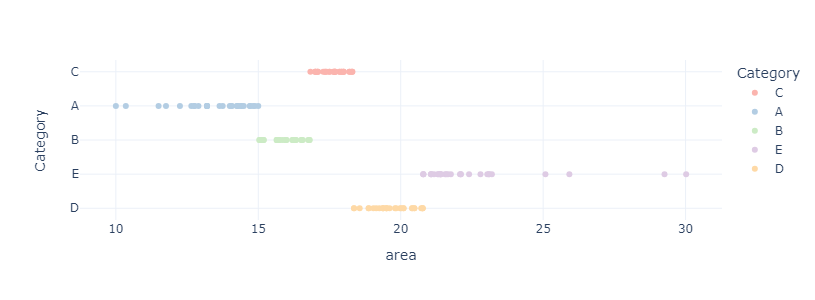

In [14]:
# 用plotly绘制散点图，维度为面积，分类为Category
fig = px.scatter(df, x = 'area', y = 'Category', 
                 color = 'Category',
                 template = "plotly_white",
                 width=600, height=300,
                 color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.show()
# pio.write_image(fig, 'plotly绘制散点图，维度为面积，分类为Category.svg')

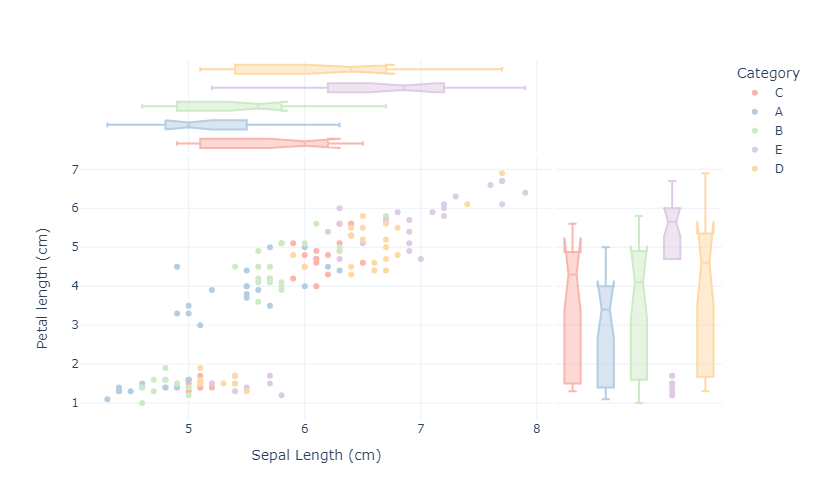

In [15]:
# 用plotly绘制散点图，边缘为箱型图，分类为 Category
fig = px.scatter(df, x = 'sepal_length', y = 'petal_length', 
                 color = 'Category', marginal_x = 'box',
                 marginal_y = 'box', template = "plotly_white",
                 width=600, height=500,
                 color_discrete_sequence=px.colors.qualitative.Pastel1,
                 labels={"sepal_length": "Sepal Length (cm)",
                         "petal_length": "Petal length (cm)"})
fig.show()
# pio.write_image(fig, '鸢尾花，散点，box, Category.svg')

In [16]:
# # 散点可视化不同类别花萼面积
# sns.scatterplot(data = df, x = 'area', y = 'Category', hue = 'Category')
# plt.savefig('area, category.svg')

In [17]:
# # 箱型图可视化不同类别花萼面积
# sns.boxplot(data = df, x = 'area', y = 'Category', hue = 'Category')
# plt.savefig('box, area, category.svg')

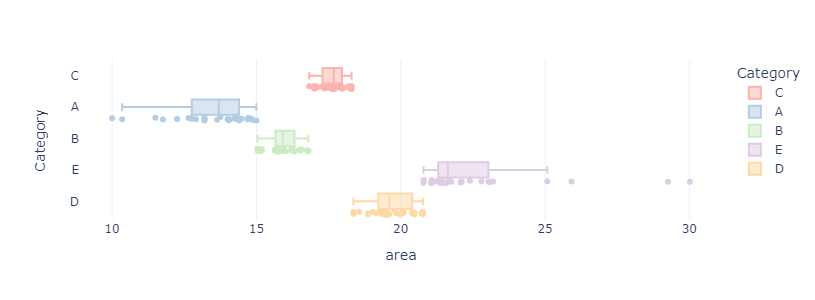

In [18]:
fig = px.box(df, x = 'area', y = 'Category',
             color = 'Category', points="all", 
             template = "plotly_white",
             width=600, height=300,
             color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.show()
# pio.write_image(fig, 'plotly绘制箱型图，边缘为箱型图.svg')

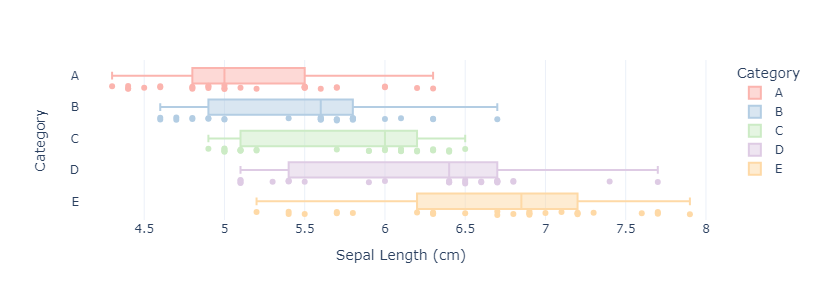

In [20]:
# 花萼长度的箱型图，考虑'Category'分类
fig = px.box(df, x = 'sepal_length', y = 'Category',
             color = 'Category', points="all", 
             template = "plotly_white",
             width=600, height=300,
             category_orders={"Category": ["A", "B", "C", "D", "E"]}, 
             color_discrete_sequence=px.colors.qualitative.Pastel1,
             labels={"sepal_length": "Sepal Length (cm)"})
fig.show()
# pio.write_image(fig, 'plotly绘制箱型图，边缘为箱型图.svg')

In [21]:
# 从Category和species两个维度切割鸢尾花数据，结果为二维频率
freq_matrix = pd.crosstab(index = df['Category'], 
                          columns = df['species'])

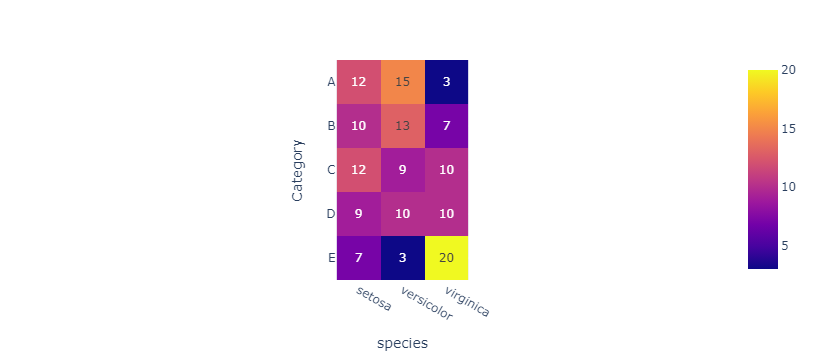

In [22]:
# 可视化二元频率数组
fig = px.imshow(freq_matrix, text_auto=True)
fig.show()
# pio.write_image(fig, '频率，热图.svg')

In [23]:
# 从Category和species两个维度切割鸢尾花数据，结果为二维频率
prob_matrix = pd.crosstab(index = df['Category'], 
                          columns = df['species'], 
                          normalize = 'all')

In [25]:
prob_matrix

species     setosa  versicolor  virginica
Category                                 
A         0.080000    0.100000   0.020000
B         0.066667    0.086667   0.046667
C         0.080000    0.060000   0.066667
D         0.060000    0.066667   0.066667
E         0.046667    0.020000   0.133333

In [27]:
# pandas.DataFrame.value_counts
df['Category'].value_counts().sort_index()

A    30
B    30
C    31
D    29
E    30
Name: Category, dtype: int64

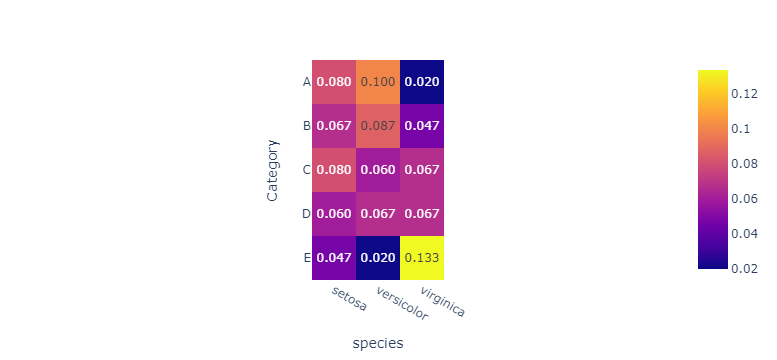

In [28]:
# 可视化二元概率数组
fig = px.imshow(prob_matrix, text_auto='.3f')
fig.show()
pio.write_image(fig, '概率，热图.svg')

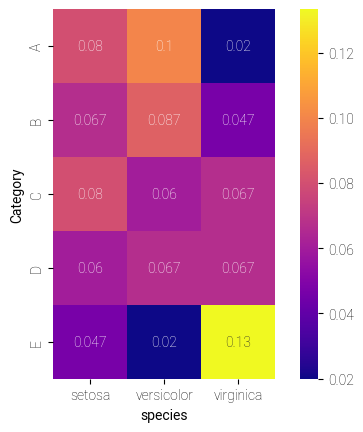

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(prob_matrix,cmap = 'plasma', square = True, annot = True)
plt.savefig('heatmap.svg')

In [30]:
prob_matrix

species     setosa  versicolor  virginica
Category                                 
A         0.080000    0.100000   0.020000
B         0.066667    0.086667   0.046667
C         0.080000    0.060000   0.066667
D         0.060000    0.066667   0.066667
E         0.046667    0.020000   0.133333

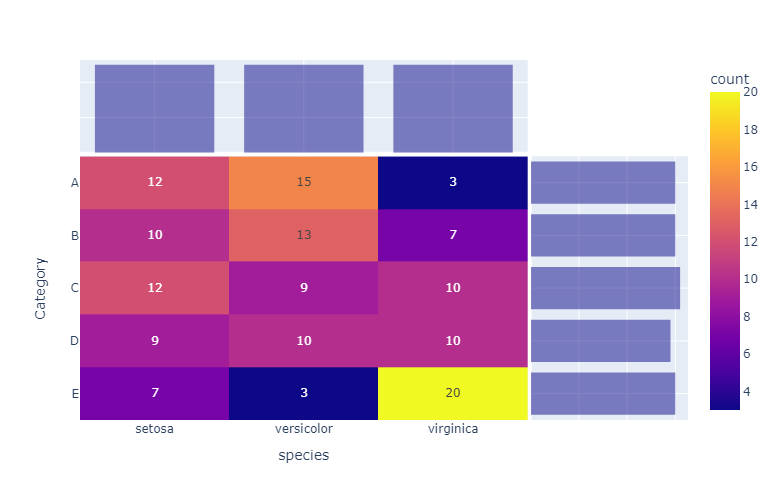

In [31]:
# 绘制二维直方热图 + 边缘直方图，计数
fig = px.density_heatmap(df, x = 'species', y = 'Category',
                         category_orders={"Category": ["A", "B", "C", "D", "E"]}, 
                         marginal_x="histogram", marginal_y="histogram",
                         text_auto = True, width = 400, height = 500)
fig.show()

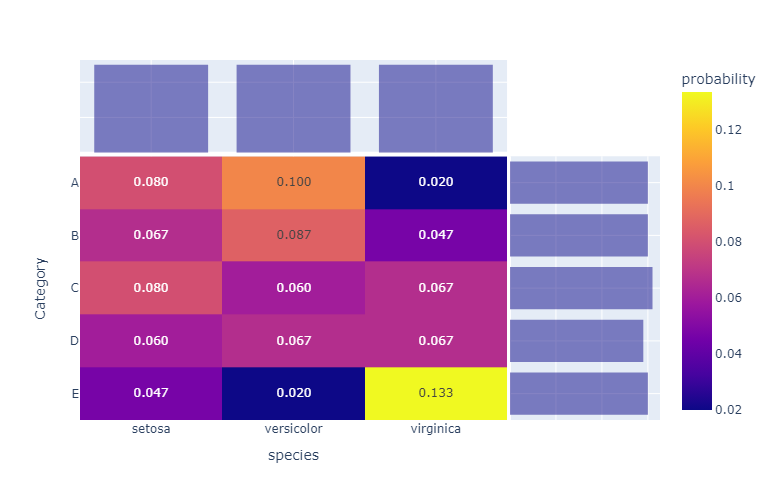

In [32]:
# 绘制二维直方热图 + 边缘直方图，概率
fig = px.density_heatmap(df, x = 'species', y = 'Category',
                         category_orders={"Category": ["A", "B", "C", "D", "E"]}, 
                         marginal_x="histogram", marginal_y="histogram",
                         histnorm = 'probability',
                         text_auto='.3f', width = 400, height = 500)
fig.show()

In [33]:
df['Category'].value_counts()

C    31
A    30
B    30
E    30
D    29
Name: Category, dtype: int64

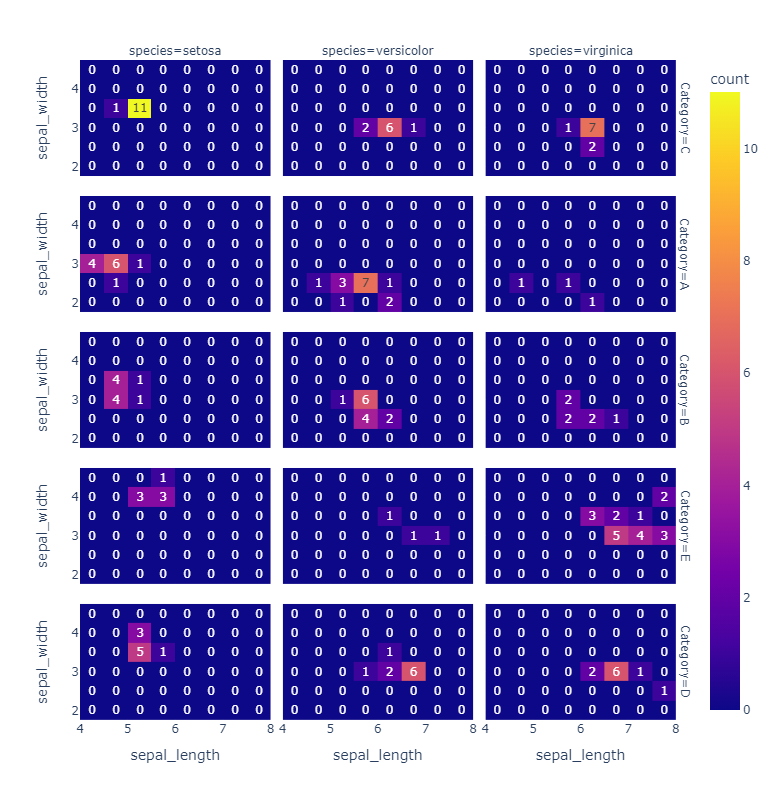

In [34]:
# 绘制频率热图，子图布置
fig = px.density_heatmap(df, 
                         x="sepal_length", y="sepal_width", 
                         facet_row="Category", facet_col="species",
                         width = 500, height = 800, text_auto=True)
fig.show()
pio.write_image(fig, '2.svg')

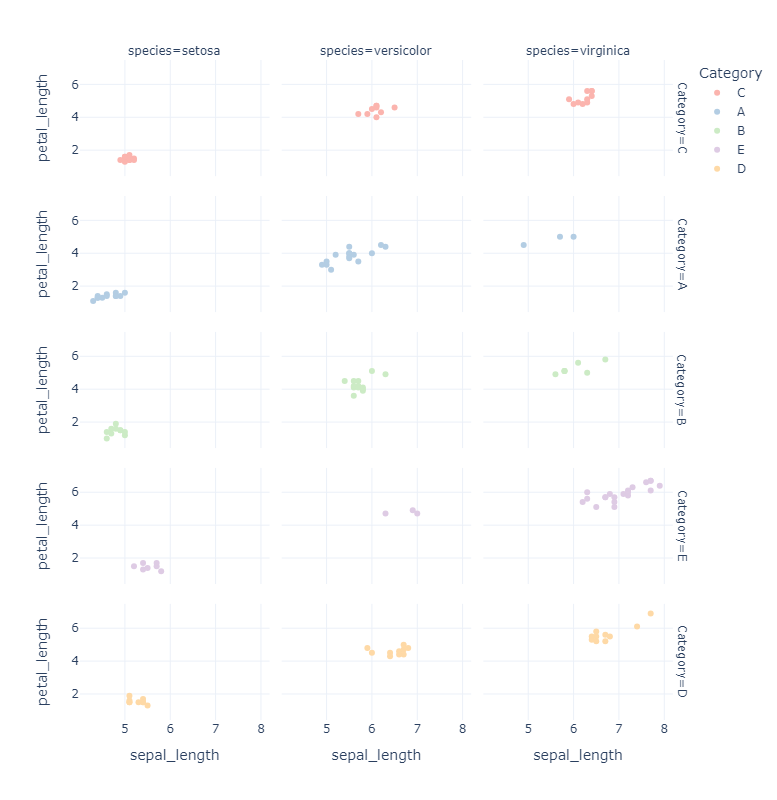

In [35]:
fig = px.scatter(df, 
                 x="sepal_length", y="petal_length", 
                 template = "plotly_white",
                 color_discrete_sequence=px.colors.qualitative.Pastel1,
                 width = 700, height = 800,
                 color="Category", facet_col="species",
                 facet_row="Category")
fig.show()
pio.write_image(fig, '3.svg')

In [36]:
# 计算 Category 百分比
ctg_percent = df['Category'].value_counts(normalize=True)
ctg_percent = pd.DataFrame({'Category':ctg_percent.index, 
                            'Ratio':ctg_percent.values})
ctg_percent

Category     Ratio
0        C  0.206667
1        A  0.200000
2        B  0.200000
3        E  0.200000
4        D  0.193333

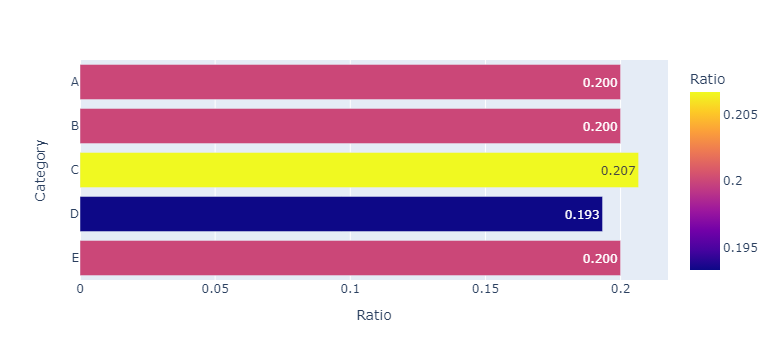

In [37]:
# 用直方图展示 Category 分类比例
fig = px.bar(ctg_percent, 
             x="Ratio", y="Category", 
             category_orders={"Category": ["A", "B", "C", "D", "E"]}, 
             color = "Ratio", orientation='h',
             text_auto = '.3f')
fig.show()
pio.write_image(fig, '1.svg')

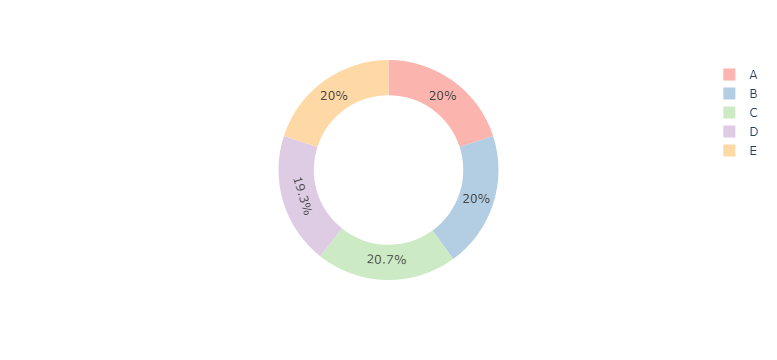

In [38]:
# 用饼图可视化 'Category' 百分比
fig = px.pie(ctg_percent, 
             category_orders={"Category": ["A", "B", "C", "D", "E"]}, 
             color_discrete_sequence=px.colors.qualitative.Pastel1,
             values='Ratio', names='Category')
fig.update_traces(hole=.68)
fig.show()
pio.write_image(fig, '2.svg')

In [39]:
# 计算 species 分类比例
species_percent = df['species'].value_counts(normalize=True)
species_percent = pd.DataFrame({'species':species_percent.index, 
                                'Ratio':species_percent.values})
species_percent

species     Ratio
0      setosa  0.333333
1  versicolor  0.333333
2   virginica  0.333333

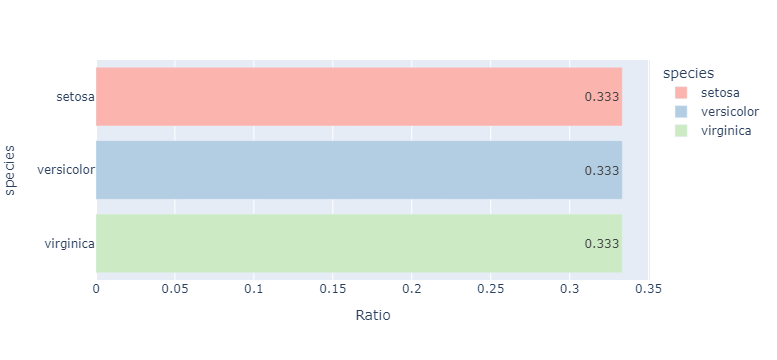

In [40]:
# 用柱状图可视化 species 分类比例
fig = px.bar(species_percent, 
             x="Ratio", y="species", 
             category_orders={"species": ["setosa", "versicolor", "virginica"]}, 
             color_discrete_sequence=px.colors.qualitative.Pastel1,
             color = "species", orientation='h',
             text_auto = '.3f')
fig.show()
pio.write_image(fig, '3.svg')

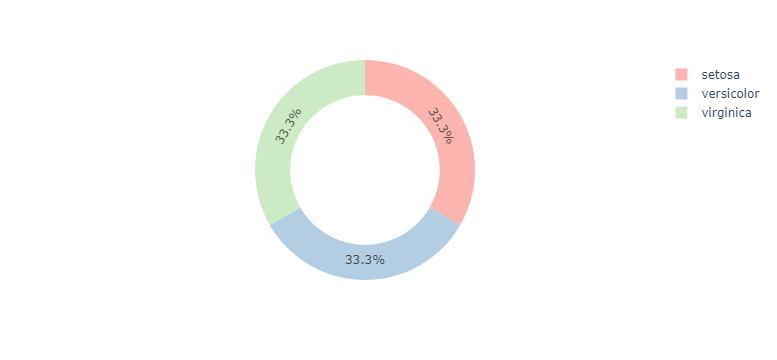

In [41]:
# 用饼图可视化 species 分类百分比
fig = px.pie(species_percent, 
             category_orders={"species": ["setosa", "versicolor", "virginica"]}, 
             color_discrete_sequence=px.colors.qualitative.Pastel1,
             values='Ratio', names='species')
fig.update_traces(hole=.68)
fig.show()
pio.write_image(fig, '4.svg')

In [42]:
# 绝对钻取

In [43]:
# 将概率值 (比例值) stack 起来
prob_matrix_stacked = prob_matrix.stack().reset_index().rename(
    columns={0: "Ratio"})
prob_matrix_stacked


Category     species     Ratio
0         A      setosa  0.080000
1         A  versicolor  0.100000
2         A   virginica  0.020000
3         B      setosa  0.066667
4         B  versicolor  0.086667
5         B   virginica  0.046667
6         C      setosa  0.080000
7         C  versicolor  0.060000
8         C   virginica  0.066667
9         D      setosa  0.060000
10        D  versicolor  0.066667
11        D   virginica  0.066667
12        E      setosa  0.046667
13        E  versicolor  0.020000
14        E   virginica  0.133333

In [48]:
prob_matrix_stacked.to_csv('prob_matrix_stacked.csv')

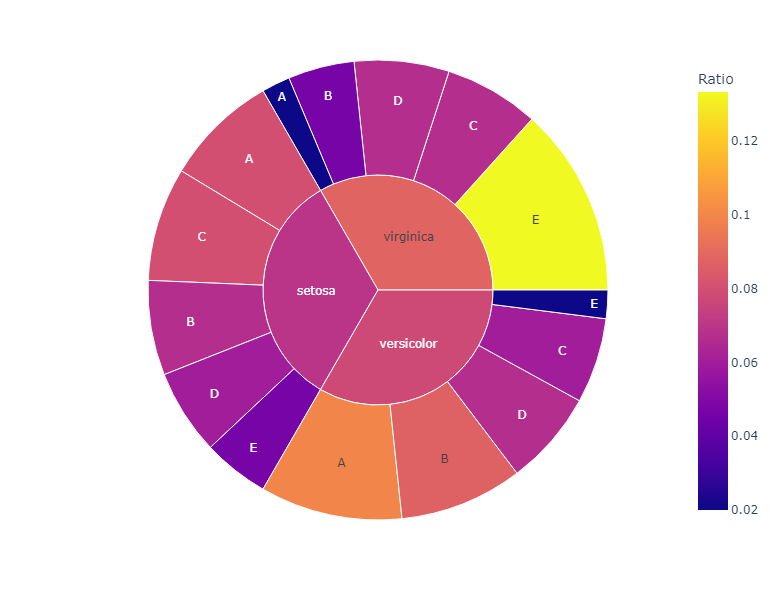

In [44]:
# 用太阳爆炸图进行钻取，先 species，再 Category
fig = px.sunburst(prob_matrix_stacked, 
                  path=['species', 'Category'], 
                  values='Ratio', color='Ratio',
                  width = 600, height = 600)
fig.show()
pio.write_image(fig, '5.svg')

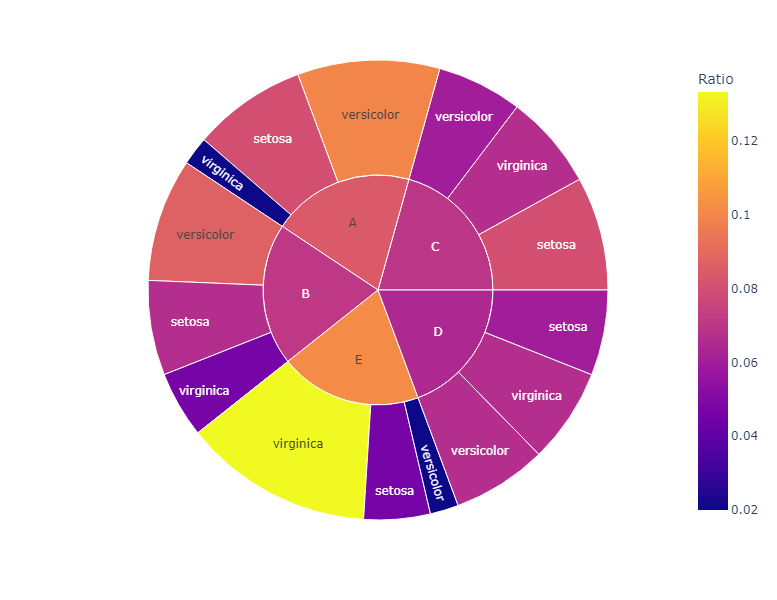

In [45]:
# 用太阳爆炸图进行钻取，先 Category，再 species
fig = px.sunburst(prob_matrix_stacked, 
                  path=['Category', 'species'], 
                  values='Ratio', color='Ratio',
                  width = 600, height = 600)
fig.show()
pio.write_image(fig, '6.svg')

In [49]:
# 再增加一层钻取维度
labels = ["{0} - {1} cm".format(i, i+1) for i in range(4, 8)]
df["sepal_length_bins"] = pd.cut(df.sepal_length, range(4, 9), 
                                 right=False, labels=labels)

In [47]:
# sepal_length_bins_counts

NameError: name 'sepal_length_bins_counts' is not defined

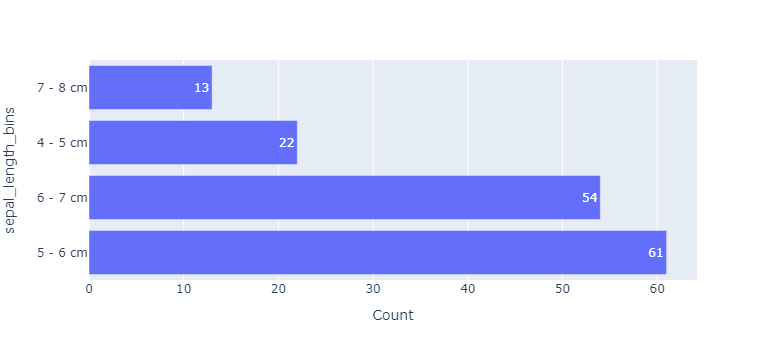

In [50]:
# 可视化第三维度样本计数
sepal_length_bins_counts = df["sepal_length_bins"].value_counts()
sepal_length_bins_counts = pd.DataFrame({
    'sepal_length_bins':sepal_length_bins_counts.index, 
    'Count':sepal_length_bins_counts.values})

fig = px.bar(sepal_length_bins_counts, 
             x = 'Count', y = 'sepal_length_bins',
             orientation = 'h', text_auto=True)
fig.show()
pio.write_image(fig, '9.svg')

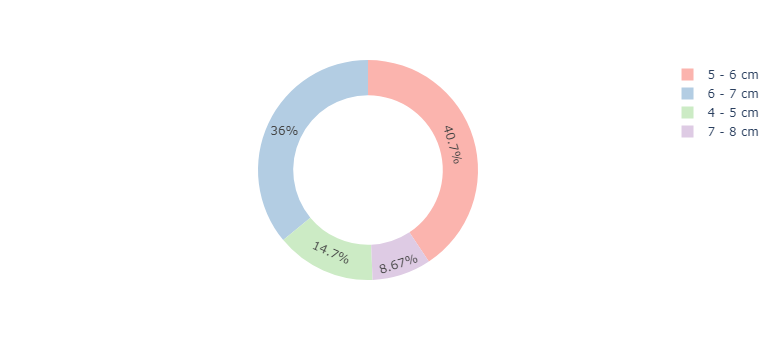

In [51]:
# 可视化第三维度样本比例
fig = px.pie(sepal_length_bins_counts, 
             color_discrete_sequence=px.colors.qualitative.Pastel1,
             values='Count', names='sepal_length_bins')
fig.update_traces(hole=.68)
fig.show()
pio.write_image(fig, '10.svg')

In [56]:
df.sepal_length.mean()

5.843333333333334

In [55]:
# 计算三个维度转取的比例 (概率）值
dims = ['species','Category','sepal_length_bins']

prob_matrix_by_3 = df.groupby(dims)['sepal_length'].apply(
    lambda x: x.count()/len(df)) 
prob_matrix_by_3

species     Category  sepal_length_bins
setosa      A         4 - 5 cm             0.073333
                      5 - 6 cm             0.006667
                      6 - 7 cm                  NaN
                      7 - 8 cm                  NaN
            B         4 - 5 cm             0.053333
                      5 - 6 cm             0.013333
                      6 - 7 cm                  NaN
                      7 - 8 cm                  NaN
            C         4 - 5 cm             0.006667
                      5 - 6 cm             0.073333
                      6 - 7 cm                  NaN
                      7 - 8 cm                  NaN
            D         4 - 5 cm                  NaN
                      5 - 6 cm             0.060000
                      6 - 7 cm                  NaN
                      7 - 8 cm                  NaN
            E         4 - 5 cm                  NaN
                      5 - 6 cm             0.046667
                      6 

In [54]:
prob_matrix_by_3 = prob_matrix_by_3.reset_index()
prob_matrix_by_3

species Category sepal_length_bins  sepal_length
0       setosa        A          4 - 5 cm      0.073333
1       setosa        A          5 - 6 cm      0.006667
2       setosa        A          6 - 7 cm           NaN
3       setosa        A          7 - 8 cm           NaN
4       setosa        B          4 - 5 cm      0.053333
5       setosa        B          5 - 6 cm      0.013333
6       setosa        B          6 - 7 cm           NaN
7       setosa        B          7 - 8 cm           NaN
8       setosa        C          4 - 5 cm      0.006667
9       setosa        C          5 - 6 cm      0.073333
10      setosa        C          6 - 7 cm           NaN
11      setosa        C          7 - 8 cm           NaN
12      setosa        D          4 - 5 cm           NaN
13      setosa        D          5 - 6 cm      0.060000
14      setosa        D          6 - 7 cm           NaN
15      setosa        D          7 - 8 cm           NaN
16      setosa        E          4 - 5 cm           NaN
17      setosa        E          5 - 6 cm      0.046667
18      setosa        E          6 - 7 cm           NaN
19      setosa        E          7 - 8 cm           NaN
20  versicolor        A          4 - 5 cm      0.006667
21  versicolor        A          5 - 6 cm      0.073333
22  versicolor        A          6 - 7 cm      0.020000
23  versicolor        A          7 - 8 cm           NaN
24  versicolor        B          4 - 5 cm           NaN
25  versicolor        B          5 - 6 cm      0.073333
26  versicolor        B          6 - 7 cm      0.013333
27  versicolor        B          7 - 8 cm           NaN
28  versicolor        C          4 - 5 cm           NaN
29  versicolor        C          5 - 6 cm      0.013333
30  versicolor        C          6 - 7 cm      0.046667
31  versicolor        C          7 - 8 cm           NaN
32  versicolor        D          4 - 5 cm           NaN
33  versicolor        D          5 - 6 cm      0.006667
34  versicolor        D          6 - 7 cm      0.060000
35  versicolor        D          7 - 8 cm           NaN
36  versicolor        E          4 - 5 cm           NaN
37  versicolor        E          5 - 6 cm           NaN
38  versicolor        E          6 - 7 cm      0.013333
39  versicolor        E          7 - 8 cm      0.006667
40   virginica        A          4 - 5 cm      0.006667
41   virginica        A          5 - 6 cm      0.006667
42   virginica        A          6 - 7 cm      0.006667
43   virginica        A          7 - 8 cm           NaN
44   virginica        B          4 - 5 cm           NaN
45   virginica        B          5 - 6 cm      0.026667
46   virginica        B          6 - 7 cm      0.020000
47   virginica        B          7 - 8 cm           NaN
48   virginica        C          4 - 5 cm           NaN
49   virginica        C          5 - 6 cm      0.006667
50   virginica        C          6 - 7 cm      0.060000
51   virginica        C          7 - 8 cm           NaN
52   virginica        D          4 - 5 cm           NaN
53   virginica        D          5 - 6 cm           NaN
54   virginica        D          6 - 7 cm      0.053333
55   virginica        D          7 - 8 cm      0.013333
56   virginica        E          4 - 5 cm           NaN
57   virginica        E          5 - 6 cm           NaN
58   virginica        E          6 - 7 cm      0.066667
59   virginica        E          7 - 8 cm      0.066667

In [52]:
prob_matrix_by_3.rename(columns = {'sepal_length':'Ratio'}, 
                        inplace = True)

In [53]:
prob_matrix_by_3

species Category sepal_length_bins     Ratio
0       setosa        A          4 - 5 cm  0.073333
1       setosa        A          5 - 6 cm  0.006667
2       setosa        A          6 - 7 cm       NaN
3       setosa        A          7 - 8 cm       NaN
4       setosa        B          4 - 5 cm  0.053333
5       setosa        B          5 - 6 cm  0.013333
6       setosa        B          6 - 7 cm       NaN
7       setosa        B          7 - 8 cm       NaN
8       setosa        C          4 - 5 cm  0.006667
9       setosa        C          5 - 6 cm  0.073333
10      setosa        C          6 - 7 cm       NaN
11      setosa        C          7 - 8 cm       NaN
12      setosa        D          4 - 5 cm       NaN
13      setosa        D          5 - 6 cm  0.060000
14      setosa        D          6 - 7 cm       NaN
15      setosa        D          7 - 8 cm       NaN
16      setosa        E          4 - 5 cm       NaN
17      setosa        E          5 - 6 cm  0.046667
18      setosa        E          6 - 7 cm       NaN
19      setosa        E          7 - 8 cm       NaN
20  versicolor        A          4 - 5 cm  0.006667
21  versicolor        A          5 - 6 cm  0.073333
22  versicolor        A          6 - 7 cm  0.020000
23  versicolor        A          7 - 8 cm       NaN
24  versicolor        B          4 - 5 cm       NaN
25  versicolor        B          5 - 6 cm  0.073333
26  versicolor        B          6 - 7 cm  0.013333
27  versicolor        B          7 - 8 cm       NaN
28  versicolor        C          4 - 5 cm       NaN
29  versicolor        C          5 - 6 cm  0.013333
30  versicolor        C          6 - 7 cm  0.046667
31  versicolor        C          7 - 8 cm       NaN
32  versicolor        D          4 - 5 cm       NaN
33  versicolor        D          5 - 6 cm  0.006667
34  versicolor        D          6 - 7 cm  0.060000
35  versicolor        D          7 - 8 cm       NaN
36  versicolor        E          4 - 5 cm       NaN
37  versicolor        E          5 - 6 cm       NaN
38  versicolor        E          6 - 7 cm  0.013333
39  versicolor        E          7 - 8 cm  0.006667
40   virginica        A          4 - 5 cm  0.006667
41   virginica        A          5 - 6 cm  0.006667
42   virginica        A          6 - 7 cm  0.006667
43   virginica        A          7 - 8 cm       NaN
44   virginica        B          4 - 5 cm       NaN
45   virginica        B          5 - 6 cm  0.026667
46   virginica        B          6 - 7 cm  0.020000
47   virginica        B          7 - 8 cm       NaN
48   virginica        C          4 - 5 cm       NaN
49   virginica        C          5 - 6 cm  0.006667
50   virginica        C          6 - 7 cm  0.060000
51   virginica        C          7 - 8 cm       NaN
52   virginica        D          4 - 5 cm       NaN
53   virginica        D          5 - 6 cm       NaN
54   virginica        D          6 - 7 cm  0.053333
55   virginica        D          7 - 8 cm  0.013333
56   virginica        E          4 - 5 cm       NaN
57   virginica        E          5 - 6 cm       NaN
58   virginica        E          6 - 7 cm  0.066667
59   virginica        E          7 - 8 cm  0.066667

In [ ]:
# 用太阳爆炸图进行钻取，先 Category，再 species，最后sepal_length_bins
fig = px.sunburst(prob_matrix_by_3, 
                  path=dims, 
                  values='Ratio', 
                  width = 600, height = 600)
fig.show()
pio.write_image(fig, '7.svg')

In [ ]:
# 平行坐标图，分类数据关系图
dims_2 = ['species','sepal_length_bins','Category']

fig = px.parallel_categories(df, 
                             dimensions = dims_2,
                             width = 800, height = 500)
fig.show()
pio.write_image(fig, '1.svg')

In [ ]:
# 将species分类转为数值
df["species_numerical"] = df["species"].map(
    {"setosa": 0, "versicolor": 1, "virginica": 2})
cmap = px.colors.sequential.Plotly3
# 可视化
fig = px.parallel_categories(df, dimensions = dims_2,
                             color = "species_numerical", 
                             color_continuous_scale = cmap,  
                             width = 800, height = 500)
fig.show()
pio.write_image(fig, '1.svg')

In [ ]:
# 对 Category 比例值在 species 维度上钻取
fig = px.bar(prob_matrix, 
             template = "plotly_white",orientation = 'h',
             color_discrete_sequence=px.colors.qualitative.Pastel1,
             width=600, height=300, text_auto = '.2f')
fig.show()
pio.write_image(fig, '8.svg')

In [ ]:
# 对 species 比例值在 Category 维度上钻取
fig = px.bar(prob_matrix.T, 
             template = "plotly_white",orientation = 'h',
             color_discrete_sequence=px.colors.qualitative.Pastel1,
             width=600, height=300, text_auto = '.2f')
fig.show()
pio.write_image(fig, '9.svg')

In [ ]:
# 计算Category中species的比例
ratio_species_in_category = pd.crosstab(index = df['Category'], 
                                        columns = df['species'], 
                                        normalize = 'index')

In [ ]:
# ratio_species_in_category.plot.bar(stacked = True)
# plt.savefig('category, stacked bar.svg')

In [ ]:
fig = px.bar(ratio_species_in_category, 
             template = "plotly_white",orientation = 'h',
             color_discrete_sequence=px.colors.qualitative.Pastel1,
             width=600, height=300, text_auto = '.2f')
fig.show()
pio.write_image(fig, '计算Category中species的比例.svg')

In [ ]:
ratio_species_in_category

In [ ]:
ratio_species_in_category.to_csv('ratio_species_in_category.csv')

In [ ]:
# 计算species中Category的比例
ratio_category_in_species = pd.crosstab(index = df['species'], 
                                        columns = df['Category'], 
                                        normalize = 'index')

In [ ]:
pd.crosstab(index = df['species'], 
            columns = df['Category'], 
            normalize = 'columns')

In [ ]:
ratio_category_in_species.to_csv('ratio_category_in_species.csv')

In [ ]:
fig = px.bar(ratio_category_in_species, 
             template = "plotly_white",orientation = 'h',
             color_discrete_sequence=px.colors.qualitative.Pastel1,
             width=600, height=300, text_auto = '.2f')
fig.show()
pio.write_image(fig, '计算species中Category的比例.svg')

In [ ]:
# pd.crosstab(index = df['Category'], columns = df['species'], normalize = 'columns').T.plot.barh(stacked = True)
# plt.savefig('species, stacked bar.svg')

In [ ]:
# freq_matrix.sum(axis = 0)

In [ ]:
# freq_matrix.sum(axis = 1)

In [ ]:
# df.columns

In [ ]:
# df.groupby(['species', 'Category'])['sepal_width'].mean()

In [ ]:
# df.groupby(['Category'])['petal_length'].mean()

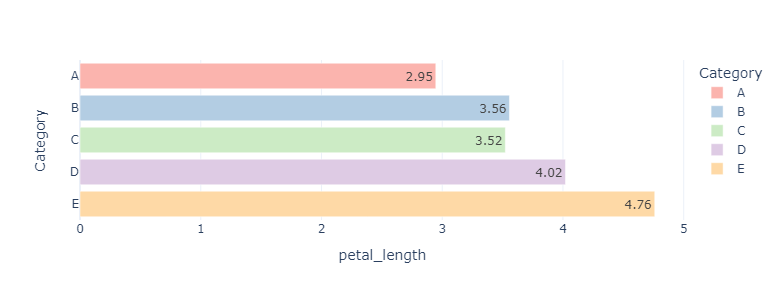

In [57]:
# 分别计算每个子类 (Category) petal_length均值
petal_length_mean_by_ctgr = df.groupby([
    'Category'])['petal_length'].mean().reset_index()
fig = px.bar(petal_length_mean_by_ctgr, 
             x = 'petal_length', y = 'Category', 
             color = 'Category',
             color_discrete_sequence=px.colors.qualitative.Pastel1,
             width=600, height=300,
             text_auto = '.2f', orientation = 'h',
             template = "plotly_white")
fig.show()
# pio.write_image(fig, 'petal_length_mean, Category.svg')

In [ ]:
# 创建交叉指标，计算petal_length平均值
# 行：Category；列：species
pd.crosstab(index = df.Category, columns = df.species, 
            values=df.petal_length, aggfunc='mean')

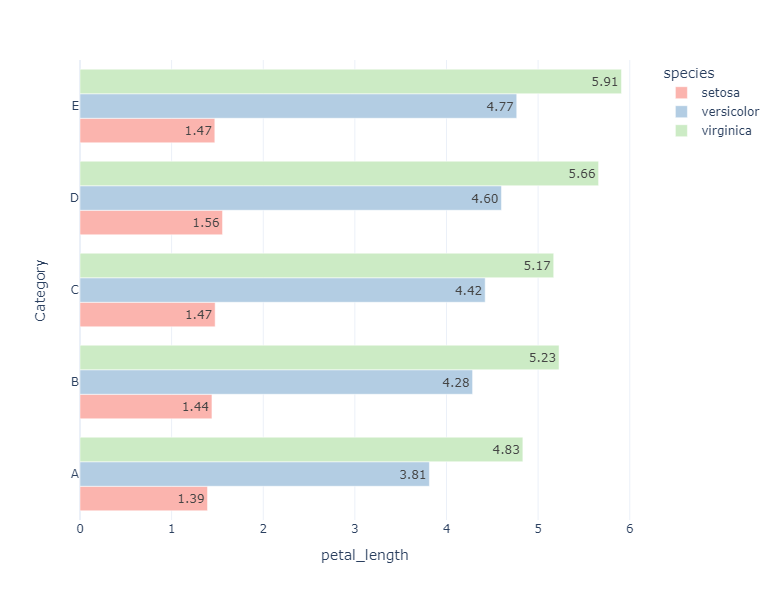

In [66]:
# 分别计算每个子类 (x Category y species) petal_length均值
petal_length_mean_by_species_ctgr = df.groupby([
    'species', 'Category'])['petal_length'].mean().reset_index()
fig = px.bar(petal_length_mean_by_species_ctgr, 
             x = 'petal_length', y = 'Category', 
             color = 'species', barmode = 'group',
             color_discrete_sequence=px.colors.qualitative.Pastel1,
             width=600, height=600,
             text_auto = '.2f', orientation = 'h',
             template = "plotly_white")
fig.show()
# pio.write_image(fig, 'petal_length_mean, Category to Species.svg')

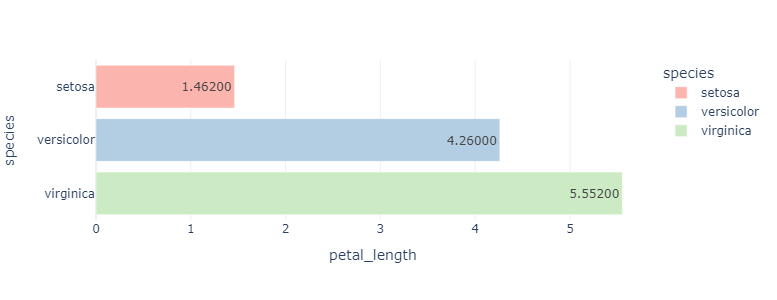

In [69]:
# 分别计算每个子类 (species) petal_length均值
petal_length_mean_by_species = df.groupby([
    'species'])['petal_length'].mean().reset_index()
fig = px.bar(petal_length_mean_by_species, 
             x = 'petal_length', y = 'species', 
             color = 'species',
             color_discrete_sequence=px.colors.qualitative.Pastel1,
             width=600, height=300,
             text_auto = '.5f', orientation = 'h',
             template = "plotly_white")
fig.show()
# pio.write_image(fig, 'petal_length_mean, species.svg')

In [70]:
pd.crosstab(index = df.Category, columns = df.species, 
            values=df.petal_length, aggfunc='mean')

species     setosa  versicolor  virginica
Category                                 
A         1.391667    3.813333   4.833333
B         1.440000    4.284615   5.228571
C         1.475000    4.422222   5.170000
D         1.555556    4.600000   5.660000
E         1.471429    4.766667   5.910000

In [68]:
petal_length_mean_by_species.mean()

C:\Users\james\AppData\Local\Temp\ipykernel_21784\2726099988.py:1: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



petal_length    3.758
dtype: float64

In [61]:
# 创建交叉指标，计算petal_length平均值
# 行：species；列：Category
pd.crosstab(index = df.species, columns = df.Category, 
            values=df.petal_length, aggfunc='mean')

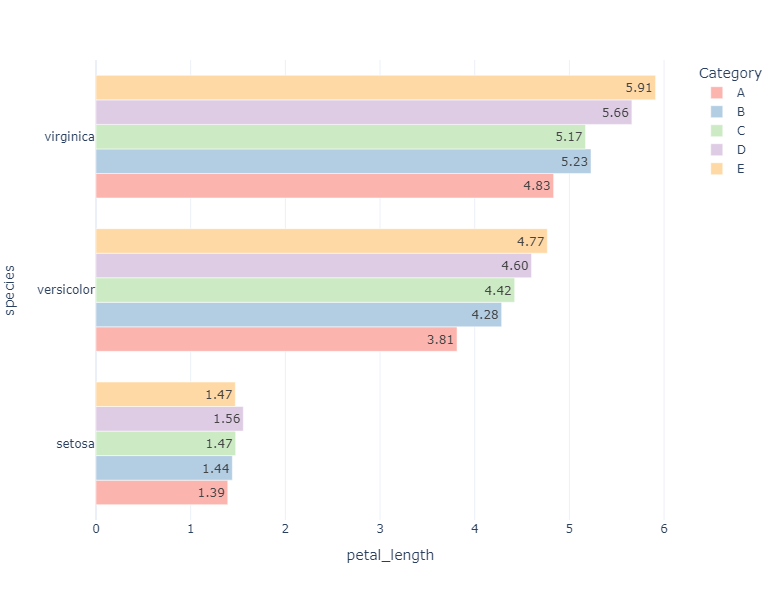

In [67]:
# 可视化petal_length均值，先species分类再Category分类
fig = px.bar(petal_length_mean_by_species_ctgr, 
             x = 'petal_length', y = 'species', 
             color = 'Category', barmode = 'group',
             text_auto = '.2f', orientation = 'h',
             width=600, height=600,
             color_discrete_sequence=px.colors.qualitative.Pastel1,
             template = "plotly_white")
fig.show()
# pio.write_image(fig, 'petal_length_mean, Species to Category.svg')

In [ ]:
sns.heatmap(pd.crosstab(index = [df.species, df.sepal_length_bins], 
            columns = df.Category, 
            values=df.petal_length, aggfunc=['mean', 'count']),
            cmap = 'Blues')

In [ ]:
pd.crosstab(index = [df.species, df.sepal_length_bins], 
            columns = df.Category, 
            values=df.petal_length, aggfunc=['mean'])

In [ ]:
px.imshow(prob_matrix, text_auto='.3f')

In [58]:
# 计算花萼长度条件均值；
# 行：sepal_length_bins
# 列：species > Category
pd.crosstab(index = df.sepal_length_bins, 
            columns = [df.species, df.Category], 
            values=df.petal_length, aggfunc='mean')

species              setosa                                      versicolor  \
Category                  A      B         C         D         E          A   
sepal_length_bins                                                             
4 - 5 cm           1.372727  1.475  1.400000       NaN       NaN   3.300000   
5 - 6 cm           1.600000  1.300  1.481818  1.555556  1.471429   3.727273   
6 - 7 cm                NaN    NaN       NaN       NaN       NaN   4.300000   
7 - 8 cm                NaN    NaN       NaN       NaN       NaN        NaN   

species                                              virginica            \
Category                  B         C         D    E         A         B   
sepal_length_bins                                                          
4 - 5 cm                NaN       NaN       NaN  NaN       4.5       NaN   
5 - 6 cm           4.154545  4.200000  4.800000  NaN       5.0  5.050000   
6 - 7 cm           5.000000  4.485714  4.577778  4.8       5.0  5.466667   
7 - 8 cm                NaN       NaN       NaN  4.7       NaN       NaN   

species                                  
Category                  C     D     E  
sepal_length_bins                        
4 - 5 cm                NaN   NaN   NaN  
5 - 6 cm           5.100000   NaN   NaN  
6 - 7 cm           5.177778  5.45  5.56  
7 - 8 cm                NaN  6.50  6.26

In [ ]:
# 计算花萼长度条件均值；
# 行：species > Category
# 列：sepal_length_bins
pd.crosstab(index = [df.species, df.Category], 
            columns = df.sepal_length_bins, 
            values=df.petal_length, aggfunc='mean')

In [ ]:
# fig = px.bar(petal_length_mean_by_3dims, 
#              barmode = 'group',
#              text_auto = '.2f', orientation = 'h',
#              width=600, height=600,
#              color_discrete_sequence=px.colors.qualitative.Pastel1,
#              template = "plotly_white")
# fig.show()

In [ ]:
# 交叉计数，计数
count_matrix = pd.crosstab(index = [df.species, df.Category], 
            columns = df.sepal_length_bins, 
            values=df.petal_length, aggfunc='count')

count_matrix = count_matrix.stack().reset_index()
count_matrix.rename(columns = {0:'count'}, inplace = True)
count_matrix = count_matrix[count_matrix['count'] != 0]  
# 删除 'count' 列值为0的行

In [ ]:
count_matrix.columns

In [ ]:
# 冰柱图
fig = px.icicle(count_matrix, 
                path=[px.Constant("all"), 'species', 'Category', 'sepal_length_bins'], 
                values = 'count',
                color_continuous_scale='Blues',
                color = 'count',
                width = 600, height = 800)
fig.show()
pio.write_image(fig, '冰柱图.svg')

In [ ]:
# 矩形树形图
fig = px.treemap(count_matrix, 
                path=[px.Constant("all"), 
                      'species', 'Category', 'sepal_length_bins'], 
                values = 'count',
                color_continuous_scale='Blues',
                color = 'count',
                width = 600, height = 800)
fig.show()
pio.write_image(fig, '矩形树形图.svg')